In [159]:
import spacy
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import torch

### Warmup: computing word frequencies
#### Most frequent words

In [152]:
file_names = ['books.txt','europarl.txt','wikipedia.txt']
encodings = ['ISO-8859-1','utf-8','utf-8']
base_dir = 'C:/Users/Colton/OneDrive/School/Machine Learning for Natural Language Processing/HW_1/a1_data/'

In [69]:
def get_frequency_counter(file_name,encoding):
    freqs = Counter()
    with open(base_dir + file_name, encoding = encoding) as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
    return freqs

In [70]:
freqs = {}
for i in range(len(file_names)):
    file_name = file_names[i]
    encoding = encodings[i]
    freqs[file_name] = get_frequency_counter(file_name, encoding)
    print('--------------' + file_name + '-------------')
    for word, freq in freqs[file_name].most_common(10):
        print(word + '\t' + str(freq))

--------------books.txt-------------
the	2425678
,	2064433
.	1958494
and	1367843
of	1321821
to	1159024
a	1103939
is	792900
in	739009
i	704436
--------------europarl.txt-------------
the	3003965
,	2115604
.	1536632
of	1422333
to	1341441
and	1158234
in	945160
that	732156
a	674231
is	671969
--------------wikipedia.txt-------------
the	3158463
,	2566261
.	1956600
of	1534698
and	1260516
in	1205759
a	958283
to	926287
-	548244
is	522101


#### dictionary-within-dictionary

In [31]:
print('Most common words following "red"')
for i in range(len(file_names)):
    file_name = file_names[i]
    encoding = encodings[i]
    freqs = defaultdict(Counter)
    with open(base_dir+file_name, encoding=encoding) as f:
        for line in f:
            tokens = line.lower().split()
            for t1, t2 in zip(tokens, tokens[1:]):
                freqs[t1][t2] += 1
    word = freqs['red'].most_common(1)[0][0]
    freq = freqs['red'].most_common(1)[0][1]
    print(file_name + ':\t' + word + '\t' + str(freq))

books.txt	sox	198
europarl.txt	tape	856
wikipedia.txt	,	532


### Investigating the word frequency distribution
Our reflection goes here

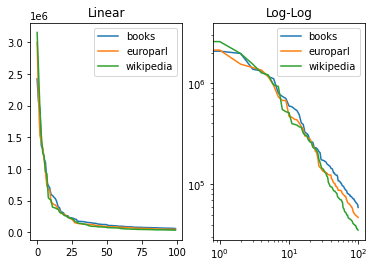

In [57]:
word_freqs = []
plt.subplot(121)
for i in range(len(file_names)):
    file_name = file_names[i]
    word_freqs.append([x[1] for x in freqs[file_name].most_common(100)])
    plt.plot(word_freqs[i],label=file_name[:-4])
plt.legend()
plt.title('Linear')

plt.subplot(122)
for i in range(len(word_freqs)):
    plt.loglog(word_freqs[i],label=file_names[i][:-4])
plt.legend()
plt.title('Log-Log')
plt.show()

### Comparing corpora

In [90]:
# freqs = {}
# for i in range(len(file_names)):
#     freqs[i] = get_frequency_counter(file_names[i], encodings[i])
for i in range(len(file_names)):
    file_name_1 = file_names[i]
    for j in range(len(file_names)):
        file_name_2 = file_names[j]
        if file_name_1 == file_name_2:
            continue
        print('Top 10 words from "' + file_name_1 + '" (first) and their relative frequency in "' + file_name_2 + '" (second):')
        print('WORD\tFREQ\tFREQ')
        top_10_counter = freqs[file_name_1].most_common(10)
        top_10_words = [x[0] for x in top_10_counter]
        relative_freq_1 = [x[1] / sum(freqs[file_name_1].values()) for x in top_10_counter]
        relative_freq_2 = []
        for word in top_10_words:
            relative_freq_2.append(freqs[file_name_2][word] / sum(freqs[file_name_2].values()))
        for i in range(len(top_10_words)):
            print(top_10_words[i] + '\t' + str(round(100*relative_freq_1[i],2)) + '%\t' + str(round(100*relative_freq_2[i],2)) + '%')
                    

Top 10 words from "books.txt" (first) and their relative frequency in "europarl.txt" (second):
WORD	FREQ	FREQ
the	4.9%	6.84%
,	4.17%	4.82%
.	3.96%	3.5%
and	2.76%	2.64%
of	2.67%	3.24%
to	2.34%	3.06%
a	2.23%	1.54%
is	1.6%	1.53%
in	1.49%	2.15%
i	1.42%	1.0%
Top 10 words from "books.txt" (first) and their relative frequency in "wikipedia.txt" (second):
WORD	FREQ	FREQ
the	4.9%	6.2%
,	4.17%	5.03%
.	3.96%	3.84%
and	2.76%	2.47%
of	2.67%	3.01%
to	2.34%	1.82%
a	2.23%	1.88%
is	1.6%	1.02%
in	1.49%	2.37%
i	1.42%	0.06%
Top 10 words from "europarl.txt" (first) and their relative frequency in "books.txt" (second):
WORD	FREQ	FREQ
the	6.84%	4.9%
,	4.82%	4.17%
.	3.5%	3.96%
of	3.24%	2.67%
to	3.06%	2.34%
and	2.64%	2.76%
in	2.15%	1.49%
that	1.67%	1.12%
a	1.54%	2.23%
is	1.53%	1.6%
Top 10 words from "europarl.txt" (first) and their relative frequency in "wikipedia.txt" (second):
WORD	FREQ	FREQ
the	6.84%	6.2%
,	4.82%	5.03%
.	3.5%	3.84%
of	3.24%	3.01%
to	3.06%	1.82%
and	2.64%	2.47%
in	2.15%	2.37%
that	1.67%	0.52

### Side show: preprocessing text for machine learning

In [204]:
class Vocab:
    def __init__(self, dataset, max_voc_size=1000, batch_size=1000):
        ############# word-to-int mapping #############
        self.dataset = dataset
        self.max_voc_size = max_voc_size
        freqs = Counter()
        tokens = dataset.lower().split()
        for token in tokens:
            freqs[token] += 1
        # freqs is dict(), i.e. freqs[word] = count
        if len(freqs) > max_voc_size:
            voc_size = max_voc_size
        else:
            voc_size = len(freqs)
        freqs = freqs.most_common(voc_size)
        # now freqs is tuple of (word, count)
        mapping = {freqs[i][0]:i+1 for i in range(voc_size)}
        # now freqs is dict of freqs[word]=r where r=rank based on frequency, r=(1,...)
        self.mapping = mapping # should use self.mapping.get('key',-1) to try non-existent keys

        
        ############# batching #####################
        split_dataset = dataset.split('\n')
        if len(split_dataset) > batch_size:
            split_dataset = split_dataset[:batch_size]
        else:
            batch_size = len(split_dataset)

        max_line_length = len(max(split_dataset, key=len))
        batches = torch.ones(max_line_length, batch_size) * -1 # -1 is the padding
        for line_idx in range(len(split_dataset)):
            line = split_dataset[line_idx]
            split_line = line.split()
            for word_idx in range(len(split_line)):
                batches[word_idx][line_idx] = mapping.get(split_line[word_idx], 0) # 0 is what words not in the mapping map to
        self.batches = batches
            
        
i = 0
max_voc_size=1000
batch_size=1000
with open(base_dir+file_names[i], encoding=encodings[i]) as f:
    dataset = f.read()
    
vc = Vocab(dataset, max_voc_size)
print(vc.mapping)
print(vc.batches)

{'the': 1, ',': 2, '.': 3, 'and': 4, 'of': 5, 'to': 6, 'a': 7, 'is': 8, 'in': 9, 'i': 10, 'this': 11, 'it': 12, 'that': 13, 'book': 14, '"': 15, 'for': 16, "'s": 17, 'as': 18, 'with': 19, 'you': 20, 'was': 21, 'on': 22, 'are': 23, 'but': 24, 'not': 25, 'his': 26, 'have': 27, 'he': 28, 'be': 29, 'one': 30, 'an': 31, 'read': 32, ')': 33, 'by': 34, '(': 35, 'from': 36, 'all': 37, 'about': 38, "n't": 39, 'or': 40, 'at': 41, 'who': 42, 'my': 43, 'has': 44, 'her': 45, 'what': 46, '-': 47, 'if': 48, 'more': 49, 'so': 50, 'they': 51, '!': 52, 'do': 53, 'there': 54, 'will': 55, 'how': 56, 'very': 57, 'like': 58, 'their': 59, 'would': 60, 'can': 61, 'some': 62, 'she': 63, 'we': 64, 'out': 65, 'which': 66, 'when': 67, 'me': 68, 'just': 69, "'": 70, 'great': 71, 'story': 72, 'many': 73, 'good': 74, 'time': 75, 'other': 76, 'life': 77, 'books': 78, 'into': 79, 'also': 80, 'had': 81, 'up': 82, 'your': 83, 'only': 84, 'most': 85, ':': 86, 'well': 87, 'than': 88, '?': 89, 'people': 90, 'first': 91, 'm

### Trying out an NLP toolkit

In [211]:
import spacy
nlp = spacy.load('en_core_web_sm')
# !python -m spacy download en

#### Processing a text

In [212]:
example = 'Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.'
result = nlp(example)

In [213]:
from spacy import displacy
displacy.render(result, style='ent', jupyter=True)
# displacy.render(result, style='dep', jupyter=True)

In [225]:
for token in result:
    print('Text: ' + token.text + 
          '\tPoS: ' + token.pos_ + 
          '\tLemma: ' + token.lemma_ + 
          '\tHead: ' + str(token.head) + 
          '\tDep: ' + str(token.dep_))
    
print('----------')
for entity in result.ents:
    print(entity)

Text: Apple	PoS: PROPN	Lemma: Apple	Head: bought	Dep: nsubj
Text: bought	PoS: VERB	Lemma: buy	Head: bought	Dep: ROOT
Text: two	PoS: NUM	Lemma: two	Head: companies	Dep: nummod
Text: companies	PoS: NOUN	Lemma: company	Head: bought	Dep: dobj
Text: this	PoS: DET	Lemma: this	Head: year	Dep: det
Text: year	PoS: NOUN	Lemma: year	Head: bought	Dep: npadvmod
Text: and	PoS: CCONJ	Lemma: and	Head: bought	Dep: cc
Text: no	PoS: DET	Lemma: no	Head: one	Dep: det
Text: one	PoS: NOUN	Lemma: one	Head: knew	Dep: nsubj
Text: knew	PoS: VERB	Lemma: know	Head: bought	Dep: conj
Text: ,	PoS: PUNCT	Lemma: ,	Head: knew	Dep: punct
Text: Mark	PoS: PROPN	Lemma: Mark	Head: Gurman	Dep: compound
Text: Gurman	PoS: PROPN	Lemma: Gurman	Head: bought	Dep: dobj
Text: at	PoS: ADP	Lemma: at	Head: bought	Dep: prep
Text: 9to5Mac	PoS: NUM	Lemma: 9to5mac	Head: reports	Dep: nummod
Text: reports	PoS: NOUN	Lemma: report	Head: at	Dep: pobj
Text: .	PoS: PUNCT	Lemma: .	Head: bought	Dep: punct
----------
Apple
two
this year
Mark Gurman
9

Obviously, "two" is not a named entity. 
It got it right that "one" in this case is a noun, not a number while "two" is a number. However "9to5Mac" is not a number. Also, "reports" is a verb not a noun.

### Additional questions


In [226]:
corpora = {}
for i in range(len(file_names)):
    with open(base_dir+file_names[i],encoding=encodings[i]) as f:
        corpora[file_names[i]] = f.read()

#### Which are the most frequent nouns in the book review corpus?

In [242]:
num_lines = 1000
nouns = Counter()
for line in corpora['books.txt'].split('\n')[:num_lines]:
    result = nlp(line)
    for token in result:
        if token.pos_ == 'NOUN':
            nouns[token.text] += 1
print(nouns.most_common(10))

[('book', 1951), ('time', 303), ('story', 301), ('life', 288), ('books', 267), ('people', 250), ('world', 216), ('way', 204), ('author', 169), ('years', 167)]


#### Which are the most frequently mentioned countries in the Wikipedia corpus?
SpaCy tags entities as GPE (GeoPolitical Entity?) if they are countries, states, cities, provinces, etc.
We could use *geonamescache* to validate if a token is actually a country, but I don't think that's what they really want us to do

In [253]:
num_lines = 1000
countries = Counter()
for line in corpora['wikipedia.txt'].split('\n')[:num_lines]:
    result = nlp(line)
    for entity in result.ents:
        if entity.label_ == 'GPE':
            countries[entity.text] += 1
print(countries.most_common(10))

[('the United States', 9), ('France', 6), ('Washington', 6), ('England', 5), ('China', 5), ('Pakistan', 5), ('Russia', 4), ('U.S.', 4), ('California', 4), ('Ireland', 4)]


#### What are the items that people drink most frequently in the European Parliament corpus?
To count this, we look at words with POS=noun, HEAD = inflection of drink, and DEPENDENCY = "dobj"

In [313]:
inflected_forms = ['drink','drank','drunk','drinking','drinks','Drink','Drank','Drunk','Drinking','Drinks']
drinks = Counter()
for line in corpora['europarl.txt'].split('\n'):
    for inflected_form in inflected_forms:
        if inflected_form in line:
            result = nlp(line)
            for token in result:
                if token.pos_=='NOUN' and \
                    str(token.head) == inflected_form and \
                    token.dep_ == 'dobj' and \
                    token.text != inflected_form:
                    drinks[token.text] += 1
print(drinks.most_common(10))

[('water', 41), ('milk', 24), ('alcohol', 22), ('wine', 16), ('beer', 8), ('driving', 7), ('services', 4), ('glass', 4), ('tea', 3), ('advertising', 2)]
